In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pyclustertend import vat

## Loading Data and Randomly Sampling

In [13]:
sp_data = pd.read_csv('special_traffic.csv', sep = ',', index_col = None)
# special_traffic = sp_data.sample(n = 1000, random_state = 123)
# special_traffic.head()

# 3.2(a)

## Extracted the x Value

In [14]:
used_x = sp_data.loc[:,'maximum_speed': 'motorcycle']
used_x.head()

,maximum_speed,speed_limit,average_speed,vehicle_class_1,vehicle_class_2,vehicle_class_3,vehicle_class_4,vehicle_class_5,vehicle_class_6,vehicle_class_7,vehicle_class_8,vehicle_class_9,vehicle_class_10,vehicle_class_11,vehicle_class_12,vehicle_class_13,bike,motorcycle
0,36,50,30,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,13,40,10,5,0,0,0,0,0,0,0,0,0,0,0,0,5,0
2,18,40,11,8,0,0,0,0,0,0,0,0,0,0,0,0,3,0
3,35,50,26,12,0,1,0,0,0,0,0,0,0,0,0,0,1,1
4,18,40,15,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0


In [15]:
y = sp_data[['StrType']]
y.head()

,StrType
0,Council Minor
1,Council Minor
2,Council Minor
3,Council Minor
4,Council Minor


In [16]:
y['StrType'].unique()

array(['Council Minor', 'Arterial'], dtype=object)

## PCA Plot with original x 

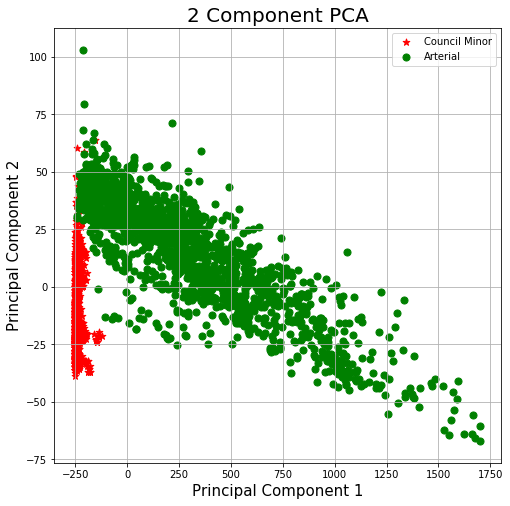

In [17]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(used_x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, y], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Council Minor', 'Arterial']
colors = ['r', 'g']
markers = ['*', 'o']
for target, color, marker in zip(targets,colors, markers):
    indicesToKeep = finalDf['StrType'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c = color,
               marker = marker,
               s = 50)
ax.legend(targets)
ax.grid()

In [19]:
pca.explained_variance_ratio_

array([0.9929711 , 0.00430925])

# 3.2(b)

In [ ]:
# From the explained variance ratio above, we know that the first two pricipal components has contained more than 99.7% of variance of
# the whole dataset. In addition, the first pricipal component contains 99.3% and the second contains 0.4%.
# From the plot above, we can easily separated data into two groups, Council Minor and Arterial, based on the two new features,
# the first Principal Conponent and the second Pricipal Conponent. We can condclude that variables that greater than -125 in first 
# Principal Conponent and greater than 50 in second Principal Conponent are Arterial. Otherwise, they are Council Minor.

# 3.2(c)

In [ ]:
vat(principalDf)

In [ ]:
vat(used_x)